In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from mlxtend.frequent_patterns import apriori, fpmax, association_rules, fpgrowth

In [2]:
file_path = r'C:\Users\...\jester-data\jester-data-1.xls'
openFile = pd.read_excel(file_path, sheet_name='jester-data-1-new',header=None)

In [3]:
#First Ten Rows
FirstTen = openFile.head(5)
print(FirstTen)

   0      1      2      3      4     5     6     7     8      9    ...    91   \
0   74  -7.82   8.79  -9.66  -8.16 -7.52 -8.50 -9.85  4.17  -8.98  ...   2.82   
1  100   4.08  -0.29   6.36   4.37 -2.38 -9.66 -0.73 -5.34   8.88  ...   2.82   
2   49  99.00  99.00  99.00  99.00  9.03  9.27  9.03  9.27  99.00  ...  99.00   
3   48  99.00   8.35  99.00  99.00  1.80  8.16 -2.82  6.21  99.00  ...  99.00   
4   91   8.50   4.61  -4.17  -5.39  1.36  1.60  7.04  4.61  -0.44  ...   5.19   

     92     93     94     95     96     97     98     99     100  
0  99.00  99.00  99.00  99.00  99.00  -5.63  99.00  99.00  99.00  
1  -4.95  -0.29   7.86  -0.19  -2.14   3.06   0.34  -4.32   1.07  
2  99.00  99.00   9.08  99.00  99.00  99.00  99.00  99.00  99.00  
3  99.00  99.00   0.53  99.00  99.00  99.00  99.00  99.00  99.00  
4   5.58   4.27   5.19   5.73   1.55   3.11   6.55   1.80   1.60  

[5 rows x 101 columns]


In [4]:
# Count rows and columns
num_rows, num_columns = openFile.shape
print(f'Number of rows: {num_rows}, Number of columns: {num_columns}')

Number of rows: 24983, Number of columns: 101


In [5]:
# Create a list for new column names
column_names = ['rated viewers'] + [f'joke {i}' for i in range(1, len(openFile.columns))]

# Assign the new names to the DataFrame
openFile.columns = column_names

# Display the updated columns
print(openFile.columns)

Index(['rated viewers', 'joke 1', 'joke 2', 'joke 3', 'joke 4', 'joke 5',
       'joke 6', 'joke 7', 'joke 8', 'joke 9',
       ...
       'joke 91', 'joke 92', 'joke 93', 'joke 94', 'joke 95', 'joke 96',
       'joke 97', 'joke 98', 'joke 99', 'joke 100'],
      dtype='object', length=101)


In [6]:
num_rows, num_columns = openFile.shape
print(f'Number of rows: {num_rows}, Number of columns: {num_columns}')

Number of rows: 24983, Number of columns: 101


In [7]:
FirstTen = openFile.head(5)
print(FirstTen)

   rated viewers  joke 1  joke 2  joke 3  joke 4  joke 5  joke 6  joke 7  \
0             74   -7.82    8.79   -9.66   -8.16   -7.52   -8.50   -9.85   
1            100    4.08   -0.29    6.36    4.37   -2.38   -9.66   -0.73   
2             49   99.00   99.00   99.00   99.00    9.03    9.27    9.03   
3             48   99.00    8.35   99.00   99.00    1.80    8.16   -2.82   
4             91    8.50    4.61   -4.17   -5.39    1.36    1.60    7.04   

   joke 8  joke 9  ...  joke 91  joke 92  joke 93  joke 94  joke 95  joke 96  \
0    4.17   -8.98  ...     2.82    99.00    99.00    99.00    99.00    99.00   
1   -5.34    8.88  ...     2.82    -4.95    -0.29     7.86    -0.19    -2.14   
2    9.27   99.00  ...    99.00    99.00    99.00     9.08    99.00    99.00   
3    6.21   99.00  ...    99.00    99.00    99.00     0.53    99.00    99.00   
4    4.61   -0.44  ...     5.19     5.58     4.27     5.19     5.73     1.55   

   joke 97  joke 98  joke 99  joke 100  
0    -5.63    99.00  

In [8]:
print(openFile.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, rated viewers to joke 100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB
None


In [12]:
null_counts = openFile.isnull().sum()
print(null_counts)

rated viewers    0
joke 1           0
joke 2           0
joke 3           0
joke 4           0
                ..
joke 96          0
joke 97          0
joke 98          0
joke 99          0
joke 100         0
Length: 101, dtype: int64


In [15]:
FirstTens = openFile.head(5)
print(FirstTens)

   rated viewers  joke 1  joke 2  joke 3  joke 4  joke 5  joke 6  joke 7  \
0             74   -7.82    8.79   -9.66   -8.16   -7.52   -8.50   -9.85   
1            100    4.08   -0.29    6.36    4.37   -2.38   -9.66   -0.73   
2             49   99.00   99.00   99.00   99.00    9.03    9.27    9.03   
3             48   99.00    8.35   99.00   99.00    1.80    8.16   -2.82   
4             91    8.50    4.61   -4.17   -5.39    1.36    1.60    7.04   

   joke 8  joke 9  ...  joke 91  joke 92  joke 93  joke 94  joke 95  joke 96  \
0    4.17   -8.98  ...     2.82    99.00    99.00    99.00    99.00    99.00   
1   -5.34    8.88  ...     2.82    -4.95    -0.29     7.86    -0.19    -2.14   
2    9.27   99.00  ...    99.00    99.00    99.00     9.08    99.00    99.00   
3    6.21   99.00  ...    99.00    99.00    99.00     0.53    99.00    99.00   
4    4.61   -0.44  ...     5.19     5.58     4.27     5.19     5.73     1.55   

   joke 97  joke 98  joke 99  joke 100  
0    -5.63    99.00  

In [18]:
# Replace value 99 with nan for all columns except first column

openFile.iloc[:, 1:] = openFile.iloc[:, 1:].replace(99, np.nan)
FirstTens = openFile.head(10)

print(FirstTens)

   rated viewers  joke 1  joke 2  joke 3  joke 4  joke 5  joke 6  joke 7  \
0             74   -7.82    8.79   -9.66   -8.16   -7.52   -8.50   -9.85   
1            100    4.08   -0.29    6.36    4.37   -2.38   -9.66   -0.73   
2             49     NaN     NaN     NaN     NaN    9.03    9.27    9.03   
3             48     NaN    8.35     NaN     NaN    1.80    8.16   -2.82   
4             91    8.50    4.61   -4.17   -5.39    1.36    1.60    7.04   
5            100   -6.17   -3.54    0.44   -8.50   -7.09   -4.32   -8.69   
6             47     NaN     NaN     NaN     NaN    8.59   -9.85    7.72   
7            100    6.84    3.16    9.17   -6.21   -8.16   -1.70    9.27   
8            100   -3.79   -3.54   -9.42   -6.89   -8.74   -0.29   -5.29   
9             72    3.01    5.15    5.15    3.01    6.41    5.15    8.93   

   joke 8  joke 9  ...  joke 91  joke 92  joke 93  joke 94  joke 95  joke 96  \
0    4.17   -8.98  ...     2.82      NaN      NaN      NaN      NaN      NaN   
1  

In [19]:
# Check null values

checkNullValues = openFile.isnull().sum()
checkNullValues

rated viewers        0
joke 1            8531
joke 2            6799
joke 3            8341
joke 4            9375
                 ...  
joke 96          14613
joke 97          14463
joke 98          14317
joke 99          14073
joke 100         15040
Length: 101, dtype: int64

In [20]:
computeNulls = openFile.isnull().sum().sum()
computeNulls

687845

In [35]:
column_counts = openFile.count().sum()
print(column_counts)

1835438


In [37]:
row_counts = openFile.count(axis=1).sum()
print(row_counts)

1835438


In [39]:
#cleaned_df = openFile.dropna()

In [41]:
#cleaned_df

,rated viewers,joke 1,joke 2,joke 3,joke 4,joke 5,joke 6,joke 7,joke 8,joke 9,...,joke 91,joke 92,joke 93,joke 94,joke 95,joke 96,joke 97,joke 98,joke 99,joke 100
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
11,100,1.31,1.80,2.57,-2.38,0.73,0.73,-0.97,5.00,-7.23,...,1.46,1.70,0.29,-3.30,3.45,5.44,4.08,2.48,4.51,4.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24958,100,-2.91,-1.89,-2.86,-1.99,-7.52,-4.66,-7.52,6.02,-3.83,...,-5.68,-5.68,-2.82,-4.61,-4.37,-3.93,-0.15,-0.87,-1.99,-1.80
24962,100,4.85,3.83,4.13,-5.53,2.14,-4.66,0.10,-1.75,0.44,...,-8.30,-9.56,-5.34,-3.50,2.04,-6.31,-4.42,3.06,-1.26,-6.36
24967,100,-0.29,-0.29,-0.29,-0.29,-1.84,0.10,-3.01,-0.29,0.49,...,0.29,0.87,3.79,0.68,0.87,4.17,0.29,1.46,-0.29,-0.68
24971,100,4.17,4.17,9.03,-0.29,2.04,3.79,7.86,-7.86,4.17,...,-0.68,7.28,4.95,-9.42,3.20,-2.23,5.92,-0.29,-0.29,4.37


In [43]:
#column_counts = cleaned_df.count().sum()
#print(column_counts)

727200


In [21]:
# Impute NaN values with the mean of each column (Replace all nall with zeros)

openFile.fillna(0, inplace=True)
FirstTens = openFile.head(10)

print(FirstTens)

   rated viewers  joke 1  joke 2  joke 3  joke 4  joke 5  joke 6  joke 7  \
0             74   -7.82    8.79   -9.66   -8.16   -7.52   -8.50   -9.85   
1            100    4.08   -0.29    6.36    4.37   -2.38   -9.66   -0.73   
2             49    0.00    0.00    0.00    0.00    9.03    9.27    9.03   
3             48    0.00    8.35    0.00    0.00    1.80    8.16   -2.82   
4             91    8.50    4.61   -4.17   -5.39    1.36    1.60    7.04   
5            100   -6.17   -3.54    0.44   -8.50   -7.09   -4.32   -8.69   
6             47    0.00    0.00    0.00    0.00    8.59   -9.85    7.72   
7            100    6.84    3.16    9.17   -6.21   -8.16   -1.70    9.27   
8            100   -3.79   -3.54   -9.42   -6.89   -8.74   -0.29   -5.29   
9             72    3.01    5.15    5.15    3.01    6.41    5.15    8.93   

   joke 8  joke 9  ...  joke 91  joke 92  joke 93  joke 94  joke 95  joke 96  \
0    4.17   -8.98  ...     2.82     0.00     0.00     0.00     0.00     0.00   
1  

In [24]:
summary = openFile.describe()
print(summary)

       rated viewers        joke 1        joke 2        joke 3        joke 4  \
count   24983.000000  24983.000000  24983.000000  24983.000000  24983.000000   
mean       72.467478      0.595687      0.151728      0.210881     -0.905326   
std        21.859600      4.218722      4.776192      4.409642      4.196537   
min        36.000000     -9.950000     -9.950000     -9.950000     -9.950000   
25%        53.000000     -0.150000     -2.180000     -1.145000     -3.350000   
50%        72.000000      0.000000      0.000000      0.000000      0.000000   
75%       100.000000      3.135000      3.250000      2.720000      0.000000   
max       100.000000      9.370000      9.370000      9.370000      9.370000   

             joke 5        joke 6        joke 7        joke 8        joke 9  \
count  24983.000000  24983.000000  24983.000000  24983.000000  24983.000000   
mean       0.403460      1.303933     -0.429542     -0.624035     -0.351213   
std        5.255073      4.474178      5.4

In [25]:
print(openFile.shape)

(24983, 101)


In [28]:
# Universal Jokes - with High ratings


UniversalJokes = ['rated viewers', 'joke 5', 'joke 7', 'joke 8', 'joke 13', 'joke 15', 'joke 16', 'joke 17', 'joke 18', 'joke 19', 'joke 20']  
jokesSubset = openFile[UniversalJokes]
firstSubsetJokes = jokesSubset.head(10)
firstSubsetJokes

,rated viewers,joke 5,joke 7,joke 8,joke 13,joke 15,joke 16,joke 17,joke 18,joke 19,joke 20
0,74,-7.52,-9.85,4.17,-7.18,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85
1,100,-2.38,-0.73,-5.34,4.42,4.56,-0.97,4.66,-0.68,3.30,-1.21
2,49,9.03,9.03,9.27,9.37,-6.36,-6.89,-7.86,9.03,9.03,9.03
3,48,1.80,-2.82,6.21,6.31,-7.23,-6.65,1.17,-6.60,-3.64,-2.09
4,91,1.36,7.04,4.61,-3.93,-2.33,-9.66,2.72,-1.36,2.57,4.51
5,100,-7.09,-8.69,-0.87,-5.00,0.49,-8.93,-3.69,-2.18,-2.28,-6.12
6,47,8.59,7.72,8.79,-6.26,6.07,-3.50,-2.09,6.17,5.15,4.42
7,100,-8.16,9.27,1.41,-6.94,0.29,-9.90,-7.09,-7.18,1.02,-0.29
8,100,-8.74,-5.29,-8.93,-4.85,-8.74,-6.99,-8.74,-2.91,-3.35,-0.29
9,72,6.41,8.93,2.52,4.47,-4.66,-0.97,-0.44,1.55,0.49,4.37


In [29]:


# All Jokes Including Universal Jokes

AllJokes = openFile
firstAllJokes = AllJokes.head(10)
firstAllJokes



,rated viewers,joke 1,joke 2,joke 3,joke 4,joke 5,joke 6,joke 7,joke 8,joke 9,...,joke 91,joke 92,joke 93,joke 94,joke 95,joke 96,joke 97,joke 98,joke 99,joke 100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,48,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [30]:
# # correlation matrix

In [31]:
# correlation matrix for Universal Jokes
universal_CorrelationMatrix = jokesSubset.corr()
print("Universal Jokes Correlation Matrix:")
print(universal_CorrelationMatrix)

Universal Jokes Correlation Matrix:
               rated viewers    joke 5    joke 7    joke 8   joke 13  \
rated viewers       1.000000  0.016669  0.036305  0.064250  0.043534   
joke 5              0.016669  1.000000  0.200247  0.161556  0.147875   
joke 7              0.036305  0.200247  1.000000  0.210816  0.166963   
joke 8              0.064250  0.161556  0.210816  1.000000  0.224117   
joke 13             0.043534  0.147875  0.166963  0.224117  1.000000   
joke 15             0.046710  0.128279  0.214213  0.229672  0.280762   
joke 16             0.045053  0.141681  0.152311  0.163489  0.144187   
joke 17             0.041314  0.227758  0.224194  0.231311  0.192323   
joke 18             0.043066  0.180312  0.224868  0.150144  0.150495   
joke 19             0.030201  0.245536  0.260850  0.109624  0.118820   
joke 20             0.026550  0.236178  0.277135  0.147529  0.096188   

                joke 15   joke 16   joke 17   joke 18   joke 19   joke 20  
rated viewers  0.046710

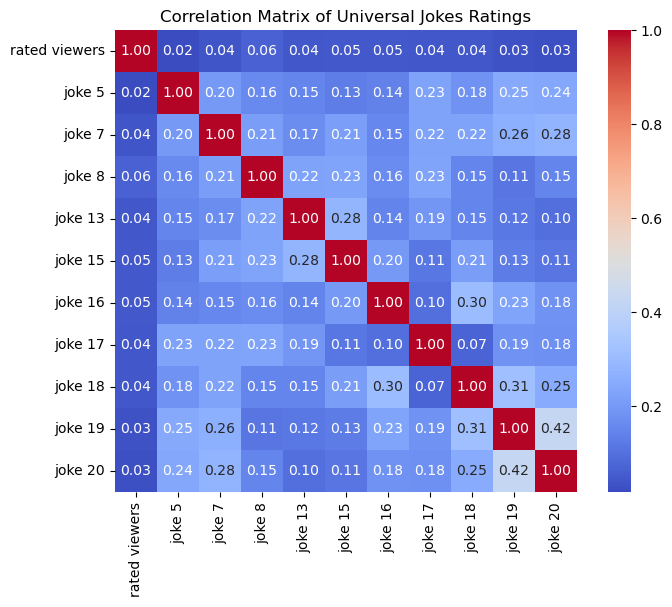

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(universal_CorrelationMatrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Universal Jokes Ratings')
plt.show()

In [35]:
# correlation matrix for All Jokes
all_CorrelationMatrix = AllJokes.corr()
print("All Jokes Correlation Matrix:")
print(all_CorrelationMatrix)

All Jokes Correlation Matrix:
               rated viewers    joke 1    joke 2    joke 3    joke 4  \
rated viewers       1.000000  0.130243  0.064035  0.054409 -0.113501   
joke 1              0.130243  1.000000  0.363017  0.356594  0.257085   
joke 2              0.064035  0.363017  1.000000  0.280523  0.288403   
joke 3              0.054409  0.356594  0.280523  1.000000  0.349201   
joke 4             -0.113501  0.257085  0.288403  0.349201  1.000000   
...                      ...       ...       ...       ...       ...   
joke 96             0.203818  0.164828  0.120752  0.132743  0.167097   
joke 97             0.210717  0.164502  0.134216  0.133086  0.147496   
joke 98             0.105148  0.137543  0.199965  0.160863  0.249863   
joke 99             0.011139  0.123911  0.104608  0.144088  0.224609   
joke 100            0.171444  0.168071  0.219722  0.239991  0.280405   

                 joke 5    joke 6    joke 7    joke 8    joke 9  ...  \
rated viewers  0.016669  0.112932

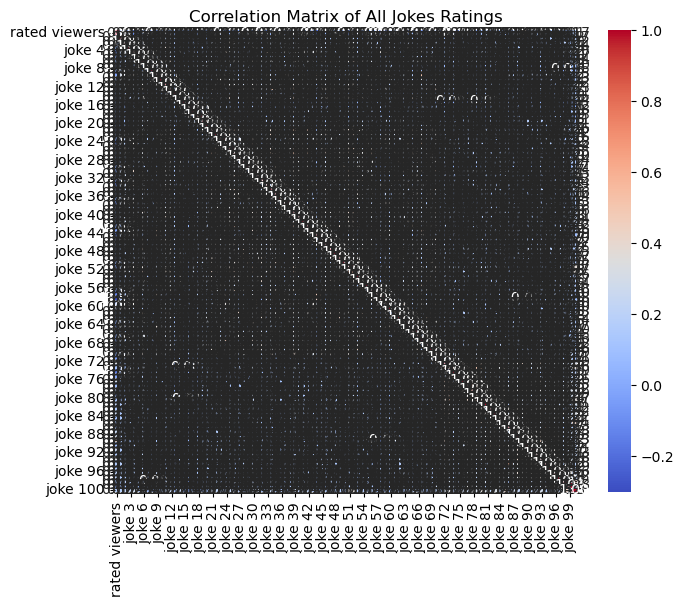

In [36]:
#Correlation matrix for all Jokes
plt.figure(figsize=(8, 6))
sns.heatmap(all_CorrelationMatrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of All Jokes Ratings')
plt.show()

In [38]:


# First Column
ratedViewersColumn = openFile.iloc[:, 0]

# For Universal Jokes
noviewers_universalJokes = jokesSubset.iloc[:, 1:]

# For all jokes
noviewers_allJokes = AllJokes.iloc[:, 1:]


# Compute mean
average_ratingsUniversaljokes = noviewers_universalJokes.mean()
average_ratingsAlljokes = noviewers_allJokes.mean()

# Uniques raters
Users_rated = ratedViewersColumn.unique()

Users_rated



array([ 74, 100,  49,  48,  91,  47,  72,  36,  51,  53,  55,  50,  67,
        60,  54,  46,  38,  41,  73,  92,  89,  71,  40,  45,  62,  63,
        61,  65,  68,  69,  37,  56,  66,  64,  82,  57,  75,  88,  86,
        43,  83,  93,  94,  44,  59,  39,  58,  70,  78,  97,  90,  84,
        98,  96,  52,  80,  42,  81,  76,  79,  85,  77,  95,  87,  99],
      dtype=int64)

In [40]:
summary_UniversalJokes = pd.DataFrame({
    'Average Rating': average_ratingsUniversaljokes,
    'Number of Ratings': ratedViewersColumn
}).reset_index().rename(columns={'index': 'Jokes'})

In [41]:
summary_AllJokes = pd.DataFrame({
    'Average Rating': average_ratingsAlljokes,
    'Number of Ratings': ratedViewersColumn
}).reset_index().rename(columns={'index': 'Jokes'})

In [44]:
# Plot for Universal Jokes

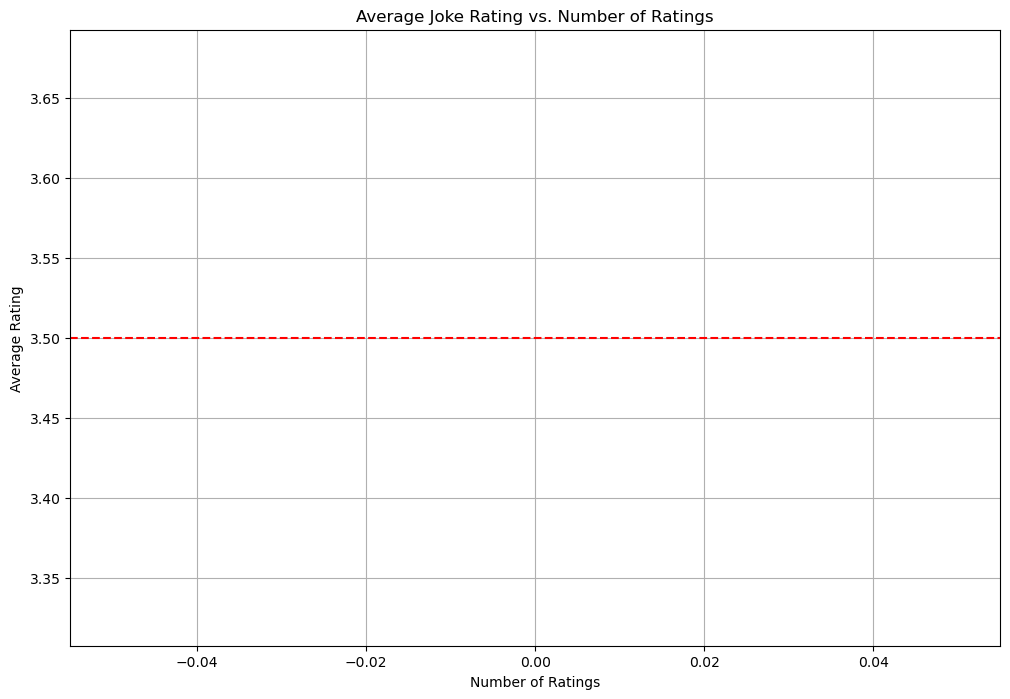

In [46]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=summary_UniversalJokes, x='Number of Ratings', y='Average Rating', alpha=0.7)
plt.title('Average Joke Rating vs. Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.grid()
plt.axhline(y=3.5, color='r', linestyle='--') 
plt.show()

C:\Users\o3006\AppData\Local\Temp\ipykernel_6716\2037496726.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_jokes_Uni, x='Average Rating', y='Jokes', palette='viridis')


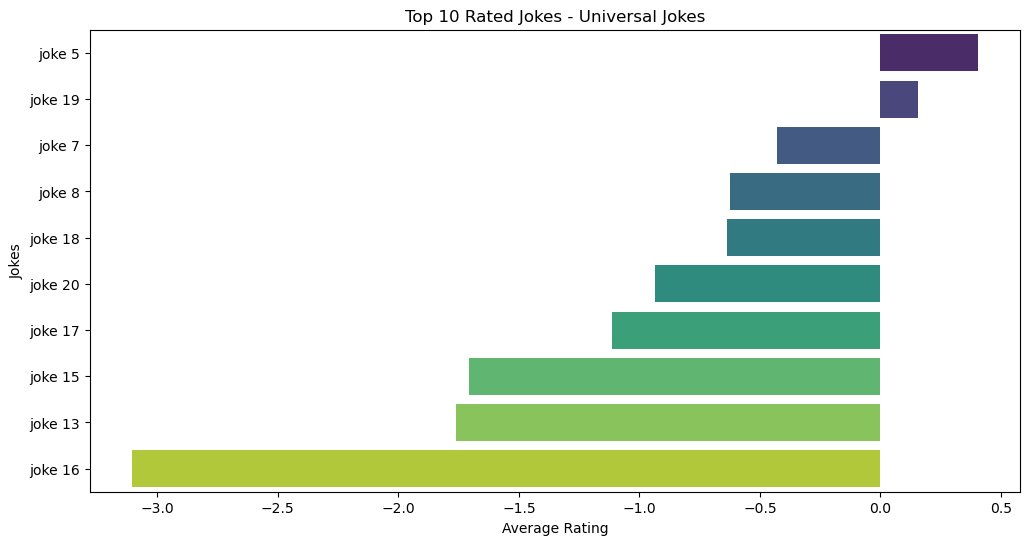

In [47]:
top_jokes_Uni = summary_UniversalJokes.nlargest(10, 'Average Rating')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_jokes_Uni, x='Average Rating', y='Jokes', palette='viridis')
plt.title('Top 10 Rated Jokes - Universal Jokes')
plt.xlabel('Average Rating')
plt.ylabel('Jokes')
plt.show()

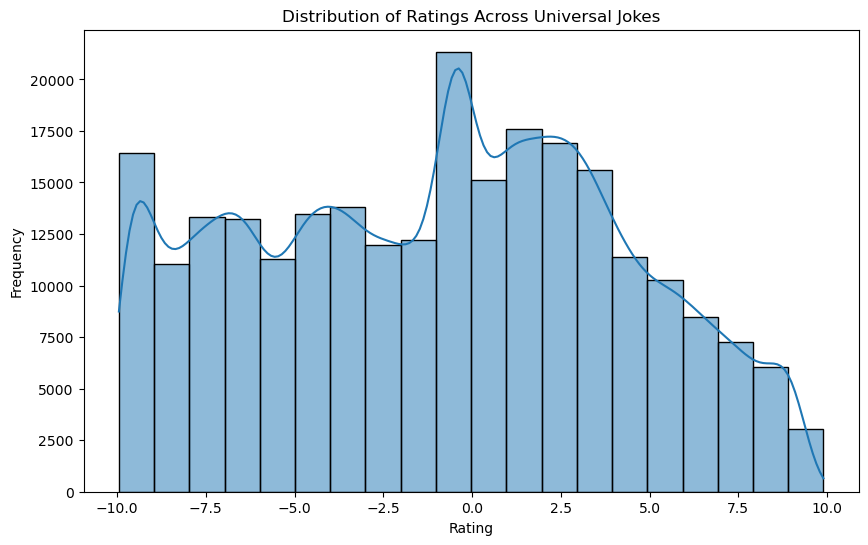

In [48]:
# 1. Distribution of Ratings for Universal Jokes


plt.figure(figsize=(10, 6))
sns.histplot(noviewers_universalJokes.values.flatten(), bins=20, kde=True)
plt.title('Distribution of Ratings Across Universal Jokes')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

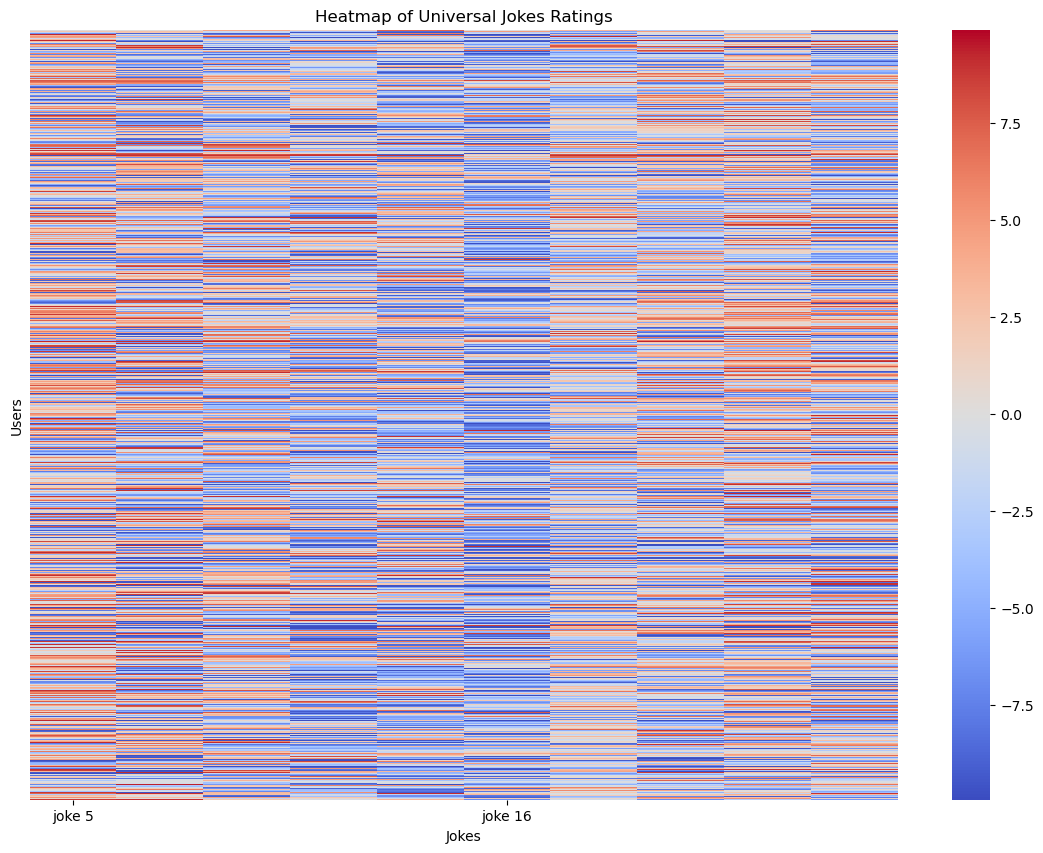

In [49]:
# Heat map for Univ Jokes

plt.figure(figsize=(14, 10))
sns.heatmap(noviewers_universalJokes, cmap='coolwarm', cbar=True, xticklabels=5, yticklabels=False)
plt.title('Heatmap of Universal Jokes Ratings')
plt.xlabel('Jokes')
plt.ylabel('Users')
plt.show()

In [50]:
print(openFile.shape)

(24983, 101)


In [52]:
# Plot for All Jokes

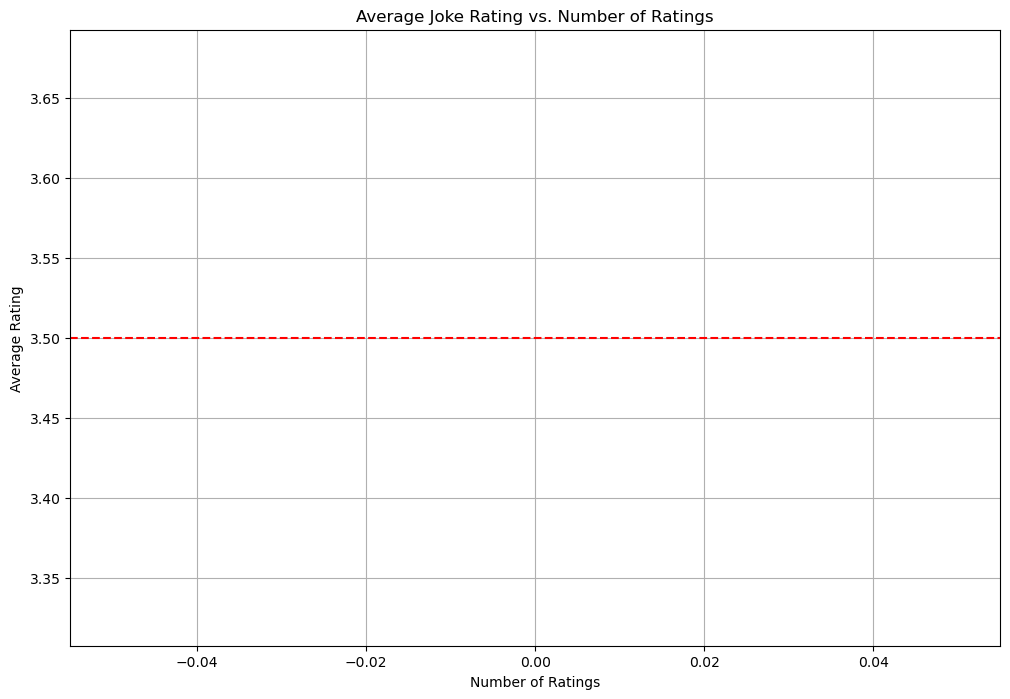

In [53]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=summary_AllJokes, x='Number of Ratings', y='Average Rating', alpha=0.7)
plt.title('Average Joke Rating vs. Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.grid()
plt.axhline(y=3.5, color='r', linestyle='--') 
plt.show()

C:\Users\o3006\AppData\Local\Temp\ipykernel_6716\3726395926.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_jokes_All, x='Average Rating', y='Jokes', palette='viridis')


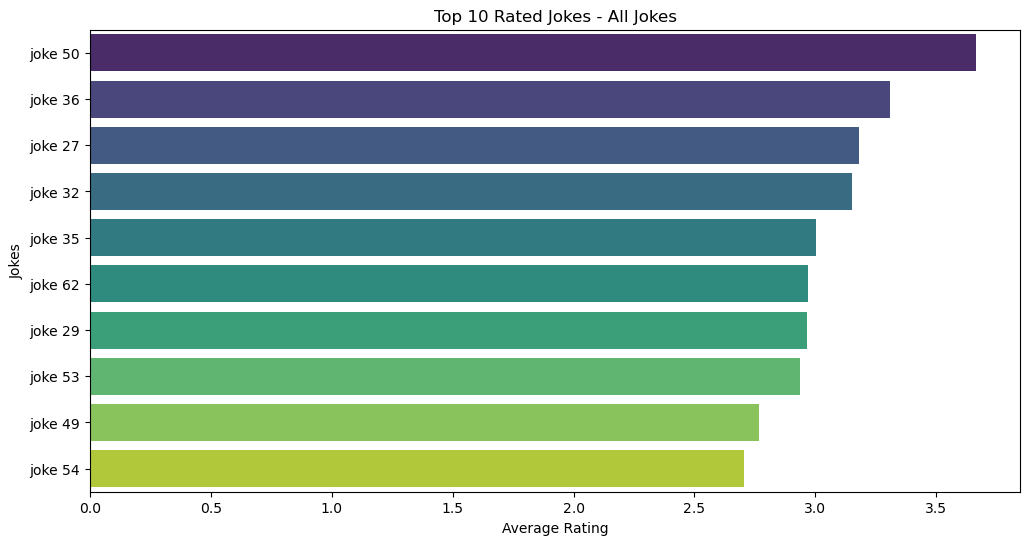

In [54]:
top_jokes_All = summary_AllJokes.nlargest(10, 'Average Rating')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_jokes_All, x='Average Rating', y='Jokes', palette='viridis')
plt.title('Top 10 Rated Jokes - All Jokes')
plt.xlabel('Average Rating')
plt.ylabel('Jokes')
plt.show()

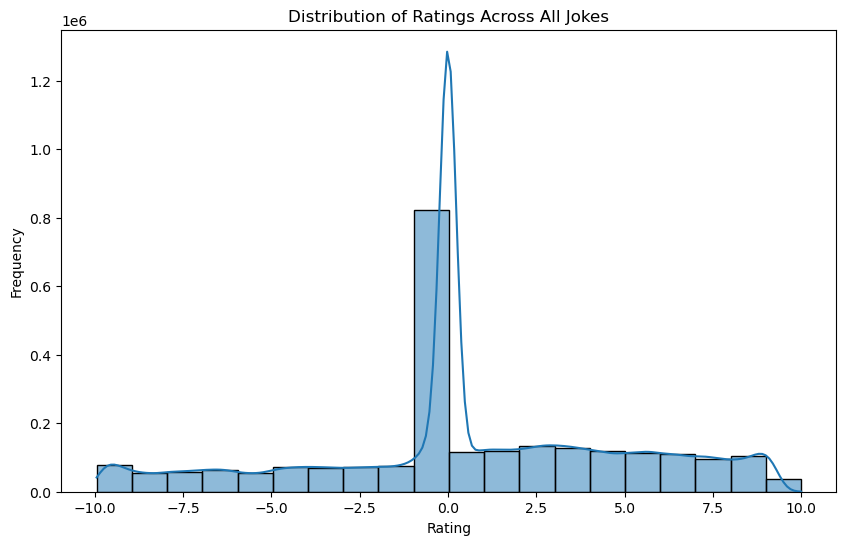

In [55]:
# 1. Distribution of Ratings for All Jokes


plt.figure(figsize=(10, 6))
sns.histplot(noviewers_allJokes.values.flatten(), bins=20, kde=True)
plt.title('Distribution of Ratings Across All Jokes')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

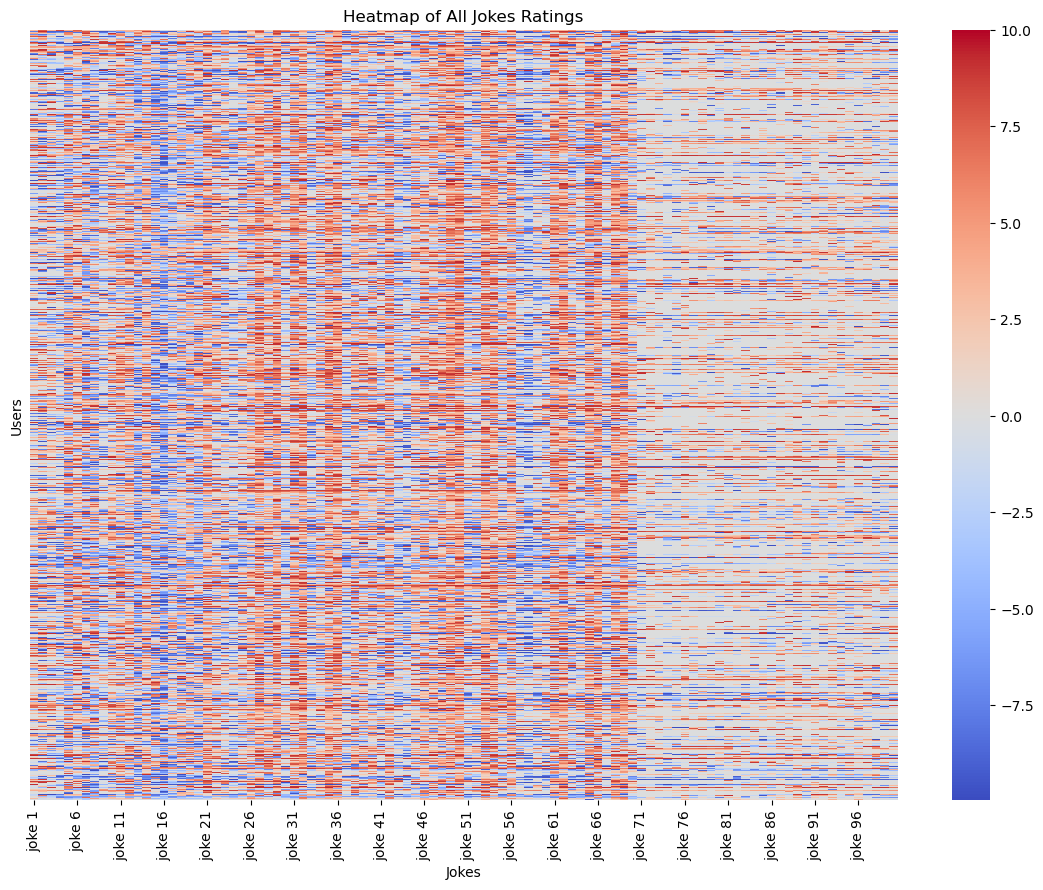

In [56]:
plt.figure(figsize=(14, 10))
sns.heatmap(noviewers_allJokes, cmap='coolwarm', cbar=True, xticklabels=5, yticklabels=False)
plt.title('Heatmap of All Jokes Ratings')
plt.xlabel('Jokes')
plt.ylabel('Users')
plt.show()

In [58]:
# Recommendation System

In [59]:
# Calculate the mean rating across all jokes and minimum count threshold
C_uni = noviewers_universalJokes.replace(0, np.nan).mean().mean()  # Mean rating across universal jokes
C_all = noviewers_allJokes.replace(0, np.nan).mean().mean()  # Mean rating across all jokes


m = ratedViewersColumn.quantile(0.7)  # Minimum number of ratings (e.g., 70th percentile)

In [60]:
# Weighted ratings for universal and all jokes
jokes_subset_weighted = noviewers_universalJokes.copy()
all_jokes_weighted = noviewers_allJokes.copy()

In [61]:
m

95.0

In [62]:
for joke in noviewers_universalJokes:
    v_uni = jokesSubset[joke].count()  # Number of ratings for uni joke
    R_uni = jokesSubset[joke].mean()    # Average rating for uni joke
    jokes_subset_weighted[joke] = ((R_uni * v_uni) + (C_uni * m)) / (v_uni + m) if v_uni > 0 else C_uni  # Apply weighted rating formula


In [63]:
jokes_subset_weighted

,joke 5,joke 7,joke 8,joke 13,joke 15,joke 16,joke 17,joke 18,joke 19,joke 20
0,0.398226,-0.43162,-0.625376,-1.759768,-1.703035,-3.095771,-1.114489,-0.636301,0.149907,-0.934052
1,0.398226,-0.43162,-0.625376,-1.759768,-1.703035,-3.095771,-1.114489,-0.636301,0.149907,-0.934052
2,0.398226,-0.43162,-0.625376,-1.759768,-1.703035,-3.095771,-1.114489,-0.636301,0.149907,-0.934052
3,0.398226,-0.43162,-0.625376,-1.759768,-1.703035,-3.095771,-1.114489,-0.636301,0.149907,-0.934052
4,0.398226,-0.43162,-0.625376,-1.759768,-1.703035,-3.095771,-1.114489,-0.636301,0.149907,-0.934052
...,...,...,...,...,...,...,...,...,...,...
24978,0.398226,-0.43162,-0.625376,-1.759768,-1.703035,-3.095771,-1.114489,-0.636301,0.149907,-0.934052
24979,0.398226,-0.43162,-0.625376,-1.759768,-1.703035,-3.095771,-1.114489,-0.636301,0.149907,-0.934052
24980,0.398226,-0.43162,-0.625376,-1.759768,-1.703035,-3.095771,-1.114489,-0.636301,0.149907,-0.934052
24981,0.398226,-0.43162,-0.625376,-1.759768,-1.703035,-3.095771,-1.114489,-0.636301,0.149907,-0.934052


In [64]:
for joke in noviewers_allJokes:
    v_all = AllJokes[joke].replace(0, np.nan).count()  # Number of ratings for all joke
    R_all = AllJokes[joke].replace(0, np.nan).mean()    # Average rating for all joke
    all_jokes_weighted[joke] = ((R_all * v_all) + (C_all * m)) / (v_all + m) if v_all > 0 else C_all  # Apply weighted rating formula


In [65]:
all_jokes_weighted

,joke 1,joke 2,joke 3,joke 4,joke 5,joke 6,joke 7,joke 8,joke 9,joke 10,...,joke 91,joke 92,joke 93,joke 94,joke 95,joke 96,joke 97,joke 98,joke 99,joke 100
0,0.90697,0.212294,0.320517,-1.438926,0.406469,1.595786,-0.425857,-0.620573,-0.550654,1.302014,...,2.031721,1.180275,2.493667,1.17415,1.04099,1.52644,1.670408,0.770135,-0.023913,1.353884
1,0.90697,0.212294,0.320517,-1.438926,0.406469,1.595786,-0.425857,-0.620573,-0.550654,1.302014,...,2.031721,1.180275,2.493667,1.17415,1.04099,1.52644,1.670408,0.770135,-0.023913,1.353884
2,0.90697,0.212294,0.320517,-1.438926,0.406469,1.595786,-0.425857,-0.620573,-0.550654,1.302014,...,2.031721,1.180275,2.493667,1.17415,1.04099,1.52644,1.670408,0.770135,-0.023913,1.353884
3,0.90697,0.212294,0.320517,-1.438926,0.406469,1.595786,-0.425857,-0.620573,-0.550654,1.302014,...,2.031721,1.180275,2.493667,1.17415,1.04099,1.52644,1.670408,0.770135,-0.023913,1.353884
4,0.90697,0.212294,0.320517,-1.438926,0.406469,1.595786,-0.425857,-0.620573,-0.550654,1.302014,...,2.031721,1.180275,2.493667,1.17415,1.04099,1.52644,1.670408,0.770135,-0.023913,1.353884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.90697,0.212294,0.320517,-1.438926,0.406469,1.595786,-0.425857,-0.620573,-0.550654,1.302014,...,2.031721,1.180275,2.493667,1.17415,1.04099,1.52644,1.670408,0.770135,-0.023913,1.353884
24979,0.90697,0.212294,0.320517,-1.438926,0.406469,1.595786,-0.425857,-0.620573,-0.550654,1.302014,...,2.031721,1.180275,2.493667,1.17415,1.04099,1.52644,1.670408,0.770135,-0.023913,1.353884
24980,0.90697,0.212294,0.320517,-1.438926,0.406469,1.595786,-0.425857,-0.620573,-0.550654,1.302014,...,2.031721,1.180275,2.493667,1.17415,1.04099,1.52644,1.670408,0.770135,-0.023913,1.353884
24981,0.90697,0.212294,0.320517,-1.438926,0.406469,1.595786,-0.425857,-0.620573,-0.550654,1.302014,...,2.031721,1.180275,2.493667,1.17415,1.04099,1.52644,1.670408,0.770135,-0.023913,1.353884


In [66]:
def format_rule(row):
    antecedents = ', '.join([joke.replace('joke ', 'Joke ') for joke in row['antecedents']])
    consequents = ', '.join([joke.replace('joke ', 'Joke ') for joke in row['consequents']])
    return f"{antecedents} => {consequents} (Support: {row['support']:.2f}, Confidence: {row['confidence']:.2f}, Lift: {row['lift']:.2f})"


In [67]:
# Convert raw and weighted ratings to binary for Apriori and FP-Growth
jokes_subset_raw_binary = noviewers_universalJokes.applymap(lambda x: 1 if x > 0 else 0)
all_jokes_raw_binary = noviewers_allJokes.applymap(lambda x: 1 if x > 0 else 0)
jokes_subset_weighted_binary = jokes_subset_weighted.applymap(lambda x: 1 if x > 0 else 0)
all_jokes_weighted_binary = all_jokes_weighted.applymap(lambda x: 1 if x > 0 else 0)

C:\Users\o3006\AppData\Local\Temp\ipykernel_6716\3436343611.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  jokes_subset_raw_binary = noviewers_universalJokes.applymap(lambda x: 1 if x > 0 else 0)
C:\Users\o3006\AppData\Local\Temp\ipykernel_6716\3436343611.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  all_jokes_raw_binary = noviewers_allJokes.applymap(lambda x: 1 if x > 0 else 0)
C:\Users\o3006\AppData\Local\Temp\ipykernel_6716\3436343611.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  jokes_subset_weighted_binary = jokes_subset_weighted.applymap(lambda x: 1 if x > 0 else 0)
C:\Users\o3006\AppData\Local\Temp\ipykernel_6716\3436343611.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  all_jokes_weighted_binary = all_jokes_weighted.applymap(lambda x: 1 if x > 0 else 0)


In [69]:
# Approach 1: Apriori with Binary Conversion - Raw Ratings (Universal Jokes)
# ===============================
frequent_itemsets_apriori_raw = apriori(jokes_subset_raw_binary, min_support=0.2, use_colnames=True)
rules_apriori_raw = association_rules(frequent_itemsets_apriori_raw, metric="confidence", min_threshold=0.6)
top_5_apriori_raw = rules_apriori_raw.nlargest(5, ['lift', 'confidence']).apply(format_rule, axis=1)


print("Top 5 Recommendations using Apriori with Raw Ratings (Universal Jokes):\n", top_5_apriori_raw.to_list())

Top 5 Recommendations using Apriori with Raw Ratings (Universal Jokes):
 ['Joke 20, Joke 18 => Joke 19 (Support: 0.20, Confidence: 0.79, Lift: 1.48)', 'Joke 19, Joke 18 => Joke 20 (Support: 0.20, Confidence: 0.64, Lift: 1.47)', 'Joke 7, Joke 19 => Joke 20 (Support: 0.20, Confidence: 0.64, Lift: 1.47)', 'Joke 5, Joke 19 => Joke 20 (Support: 0.22, Confidence: 0.63, Lift: 1.44)', 'Joke 7, Joke 20 => Joke 19 (Support: 0.20, Confidence: 0.75, Lift: 1.40)']


C:\Users\o3006\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [90]:
# ===============================
# Approach 2: Apriori with Binary Conversion - Weighted Ratings (Universal Jokes)
# ===============================
frequent_itemsets_apriori_weighted = apriori(jokes_subset_weighted_binary, min_support=0.2, use_colnames=True)
rules_apriori_weighted = association_rules(frequent_itemsets_apriori_weighted, metric="confidence", min_threshold=0.6)
top_5_apriori_weighted = rules_apriori_weighted.nlargest(5, ['lift', 'confidence']).apply(format_rule, axis=1)

print("\nTop 5 Recommendations using Apriori with Weighted Ratings (Universal Jokes):\n", top_5_apriori_weighted.to_list())



Top 5 Recommendations using Apriori with Weighted Ratings (Universal Jokes):
 ['Joke 5 => Joke 19 (Support: 1.00, Confidence: 1.00, Lift: 1.00)', 'Joke 19 => Joke 5 (Support: 1.00, Confidence: 1.00, Lift: 1.00)']


C:\Users\o3006\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [91]:
# Approach 3: FP-Growth with Binary Conversion - Raw Ratings (Universal Jokes)
# ===============================
frequent_itemsets_fp_raw = fpgrowth(jokes_subset_raw_binary, min_support=0.2, use_colnames=True)
rules_fp_raw = association_rules(frequent_itemsets_fp_raw, metric="confidence", min_threshold=0.6)
top_5_fp_raw = rules_fp_raw.nlargest(5, ['lift', 'confidence']).apply(format_rule, axis=1)


print("\nTop 5 Recommendations using FP-Growth with Raw Ratings (Universal Jokes):\n", top_5_fp_raw.to_list())

C:\Users\o3006\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Top 5 Recommendations using FP-Growth with Raw Ratings (Universal Jokes):
 ['Joke 20, Joke 18 => Joke 19 (Support: 0.20, Confidence: 0.79, Lift: 1.48)', 'Joke 19, Joke 18 => Joke 20 (Support: 0.20, Confidence: 0.64, Lift: 1.47)', 'Joke 7, Joke 19 => Joke 20 (Support: 0.20, Confidence: 0.64, Lift: 1.47)', 'Joke 5, Joke 19 => Joke 20 (Support: 0.22, Confidence: 0.63, Lift: 1.44)', 'Joke 7, Joke 20 => Joke 19 (Support: 0.20, Confidence: 0.75, Lift: 1.40)']


In [92]:
# Approach 4: FP-Growth with Binary Conversion - Weighted Ratings (Universal Jokes)
# ===============================
frequent_itemsets_fp_weighted = fpgrowth(jokes_subset_weighted_binary, min_support=0.2, use_colnames=True)
rules_fp_weighted = association_rules(frequent_itemsets_fp_weighted, metric="confidence", min_threshold=0.6)
top_5_fp_weighted = rules_fp_weighted.nlargest(5, ['lift', 'confidence']).apply(format_rule, axis=1)

print("\nTop 5 Recommendations using FP-Growth with Weighted Ratings (Universal Jokes):\n", top_5_fp_weighted.to_list())

C:\Users\o3006\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Top 5 Recommendations using FP-Growth with Weighted Ratings (Universal Jokes):
 ['Joke 5 => Joke 19 (Support: 1.00, Confidence: 1.00, Lift: 1.00)', 'Joke 19 => Joke 5 (Support: 1.00, Confidence: 1.00, Lift: 1.00)']


In [93]:
# Approach 5: Apriori with Binary Conversion - Raw Ratings (All Jokes)
# ===============================
frequent_itemsets_apriori_all_raw = apriori(all_jokes_raw_binary, min_support=0.5, use_colnames=True)
rules_apriori_all_raw = association_rules(frequent_itemsets_apriori_all_raw, metric="confidence", min_threshold=0.6)
top_5_apriori_all_raw = rules_apriori_all_raw.nlargest(5, ['lift', 'confidence']).apply(format_rule, axis=1)

print("\nTop 5 Recommendations using Apriori with Raw Ratings (All Jokes):\n", top_5_apriori_all_raw.to_list())

C:\Users\o3006\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Top 5 Recommendations using Apriori with Raw Ratings (All Jokes):
 ['Joke 49, Joke 32 => Joke 62, Joke 50 (Support: 0.50, Confidence: 0.79, Lift: 1.19)', 'Joke 62, Joke 50 => Joke 49, Joke 32 (Support: 0.50, Confidence: 0.76, Lift: 1.19)', 'Joke 49, Joke 36 => Joke 62, Joke 50 (Support: 0.50, Confidence: 0.79, Lift: 1.19)', 'Joke 62, Joke 50 => Joke 49, Joke 36 (Support: 0.50, Confidence: 0.75, Lift: 1.19)', 'Joke 35, Joke 50 => Joke 29, Joke 32 (Support: 0.51, Confidence: 0.75, Lift: 1.19)']


In [ ]:
# Approach 6: Apriori with Binary Conversion - Weighted Ratings (All Jokes)
# ===============================
frequent_itemsets_apriori_all_weighted = apriori(all_jokes_weighted_binary, min_support=1, use_colnames=True)
rules_apriori_all_weighted = association_rules(frequent_itemsets_apriori_all_weighted, metric="confidence", min_threshold=0.6)
top_5_apriori_all_weighted = rules_apriori_all_weighted.nlargest(5, ['lift', 'confidence']).apply(format_rule, axis=1)

print("\nTop 5 Recommendations using Apriori with Weighted Ratings (All Jokes):\n", top_5_apriori_all_weighted.to_list())

In [107]:
# Approach 7: FP-Growth with Binary Conversion - Raw Ratings (All Jokes)
# ===============================
frequent_itemsets_fp_all_raw = fpgrowth(all_jokes_raw_binary, min_support=0.5, use_colnames=True)
rules_fp_all_raw = association_rules(frequent_itemsets_fp_all_raw, metric="confidence", min_threshold=0.6)
top_5_fp_all_raw = rules_fp_all_raw.nlargest(5, ['lift', 'confidence']).apply(format_rule, axis=1)

print("\nTop 5 Recommendations using FP-Growth with Raw Ratings (All Jokes):\n", top_5_fp_all_raw.to_list())

C:\Users\o3006\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Top 5 Recommendations using FP-Growth with Raw Ratings (All Jokes):
 ['Joke 49, Joke 32 => Joke 62, Joke 50 (Support: 0.50, Confidence: 0.79, Lift: 1.19)', 'Joke 62, Joke 50 => Joke 49, Joke 32 (Support: 0.50, Confidence: 0.76, Lift: 1.19)', 'Joke 49, Joke 36 => Joke 62, Joke 50 (Support: 0.50, Confidence: 0.79, Lift: 1.19)', 'Joke 62, Joke 50 => Joke 49, Joke 36 (Support: 0.50, Confidence: 0.75, Lift: 1.19)', 'Joke 35, Joke 50 => Joke 29, Joke 32 (Support: 0.51, Confidence: 0.75, Lift: 1.19)']


In [ ]:
# Approach 8: FP-Growth with Binary Conversion - Weighted Ratings (All Jokes)
# ===============================
frequent_itemsets_fp_all_weighted = fpgrowth(all_jokes_weighted_binary, min_support=0.10, use_colnames=True)
rules_fp_all_weighted = association_rules(frequent_itemsets_fp_all_weighted, metric="confidence", min_threshold=0.6)
top_5_fp_all_weighted = rules_fp_all_weighted.nlargest(5, ['lift', 'confidence']).apply(format_rule, axis=1)

print("\nTop 5 Recommendations using FP-Growth with Weighted Ratings (All Jokes):\n", top_5_fp_all_weighted.to_list())


--- Visualizations of Top 5 Rules ---

Approach 1: Apriori with Raw Ratings (Universal Jokes)


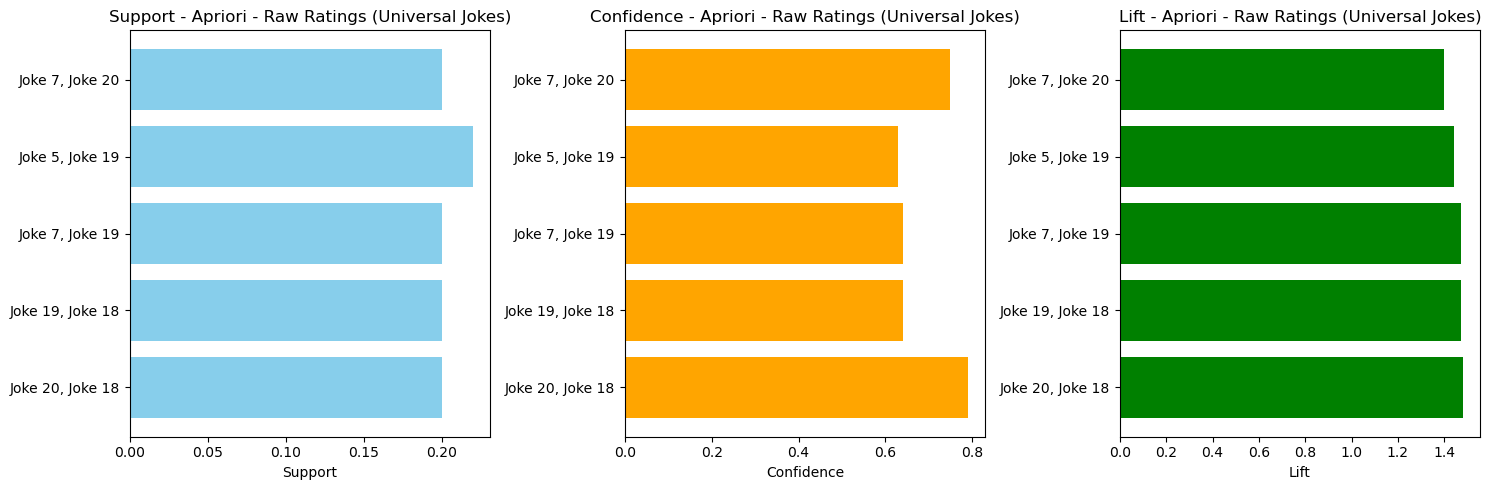


Approach 2: Apriori with Weighted Ratings (Universal Jokes)


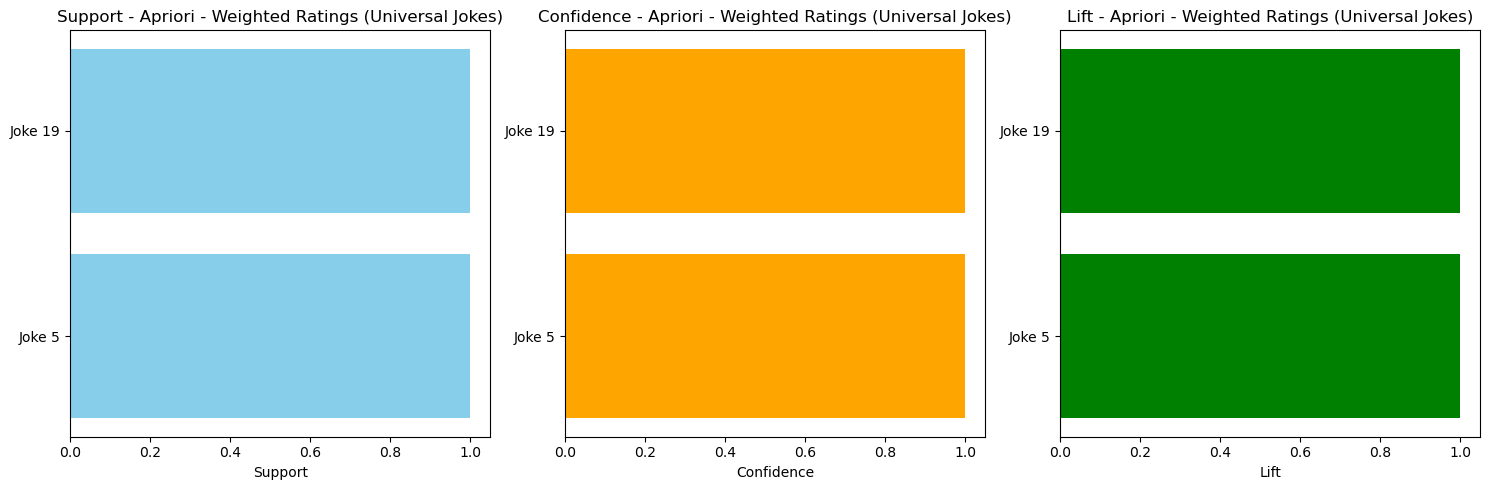


Approach 3: FP-Growth with Raw Ratings (Universal Jokes)


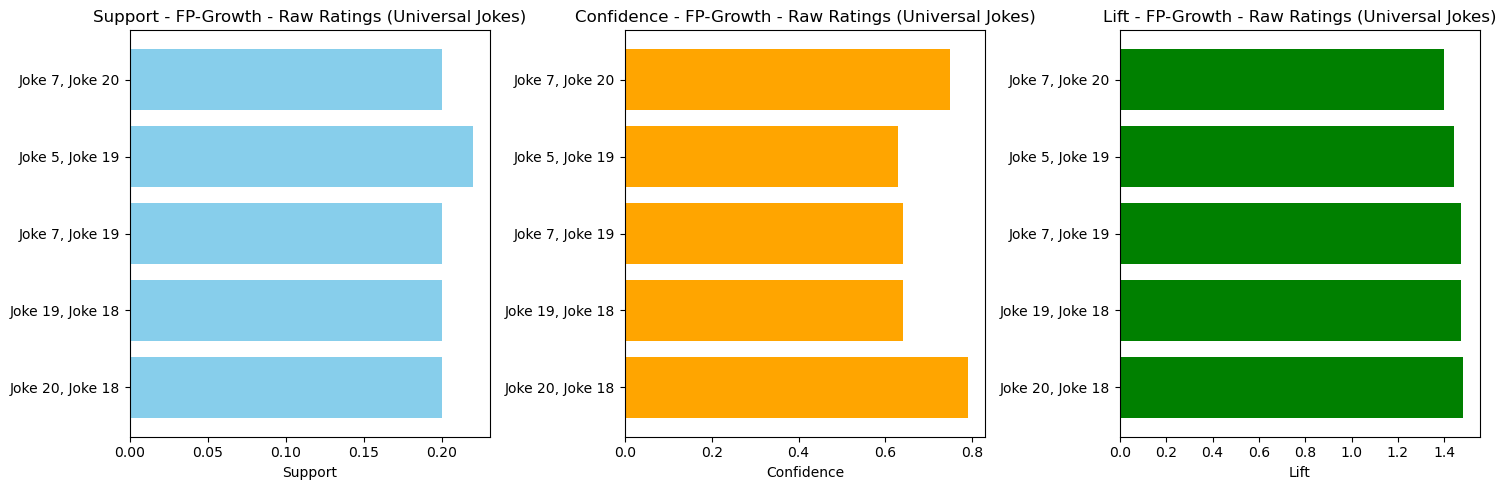


Approach 4: FP-Growth with Weighted Ratings (Universal Jokes)


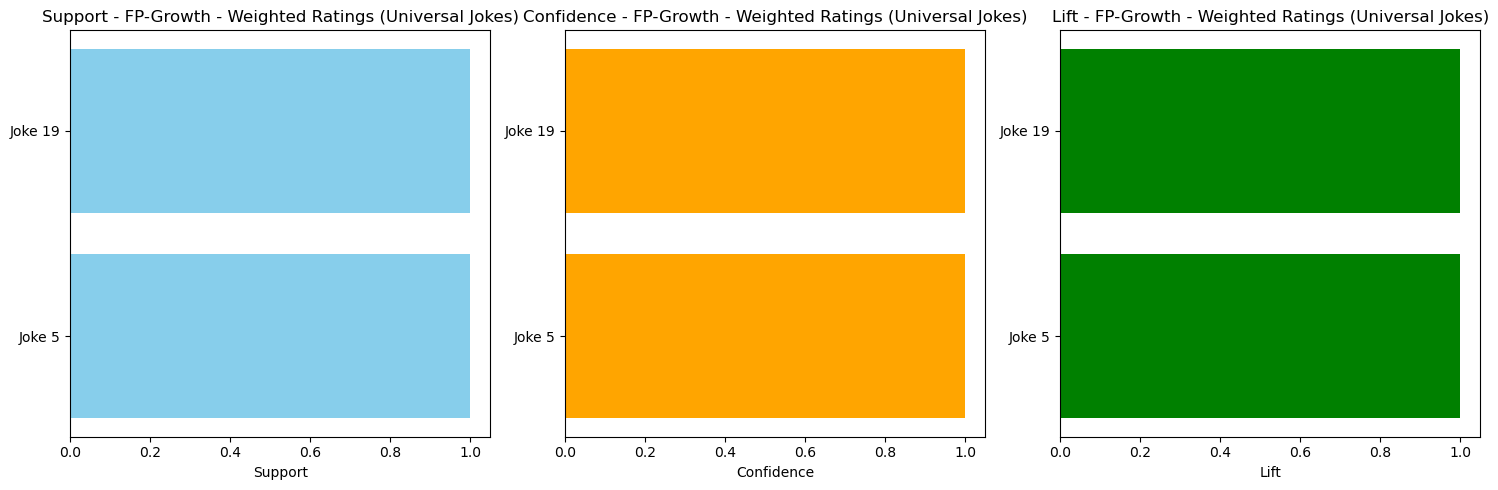


Approach 5: Apriori with Raw Ratings (All Jokes)


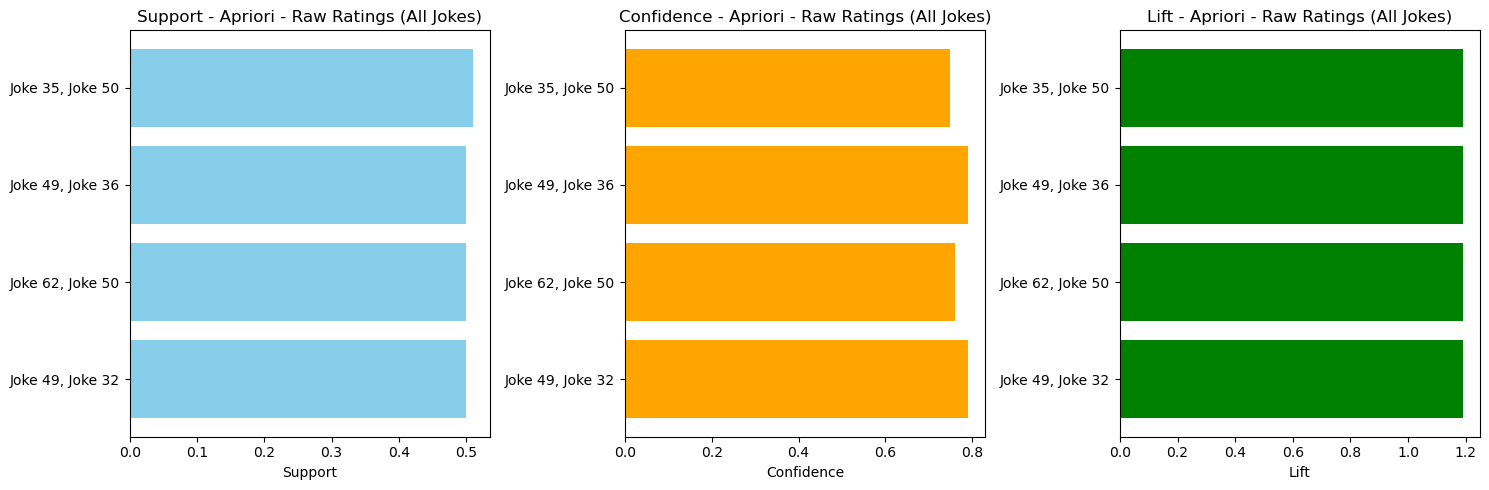


Approach 6: Apriori with Weighted Ratings (All Jokes)

Approach 7: FP-Growth with Raw Ratings (All Jokes)


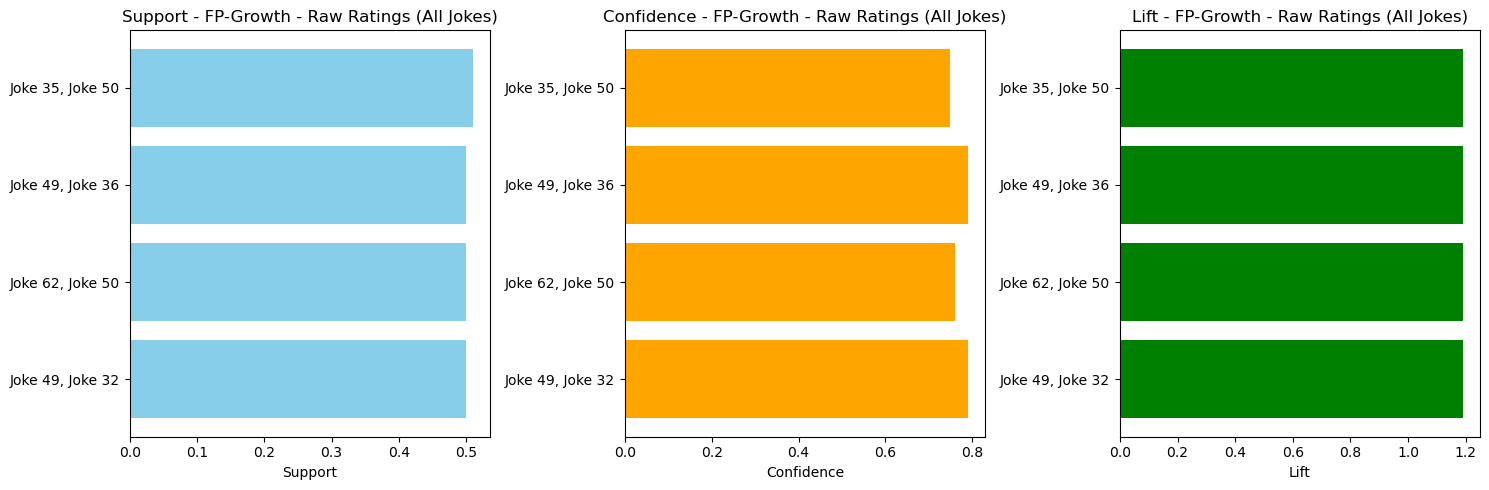


Approach 8: FP-Growth with Weighted Ratings (All Jokes)

--- Summary Table of Top 5 Recommendations ---
                                         Approach  \
0         Apriori - Raw Ratings (Universal Jokes)   
1    Apriori - Weighted Ratings (Universal Jokes)   
2       FP-Growth - Raw Ratings (Universal Jokes)   
3  FP-Growth - Weighted Ratings (Universal Jokes)   
4               Apriori - Raw Ratings (All Jokes)   
5             FP-Growth - Raw Ratings (All Jokes)   

                                         Top 5 Rules  
0  [Joke 20, Joke 18 => Joke 19 (Support: 0.20, C...  
1  [Joke 5 => Joke 19 (Support: 1.00, Confidence:...  
2  [Joke 20, Joke 18 => Joke 19 (Support: 0.20, C...  
3  [Joke 5 => Joke 19 (Support: 1.00, Confidence:...  
4  [Joke 49, Joke 32 => Joke 62, Joke 50 (Support...  
5  [Joke 49, Joke 32 => Joke 62, Joke 50 (Support...  


In [134]:
# ===============================
# Visualization: Top 5 Recommendations Charts
# ===============================
import matplotlib.pyplot as plt
import pandas as pd

# Function to visualize top 5 rules
def visualize_top_5_rules(rules, title):
    joke_pairs = []
    supports = []
    confidences = []
    lifts = []

    # Extract metrics from the rules
    for rule in rules:
        joke_pair = rule.split("=>")[0].strip() 
        joke_pairs.append(joke_pair)

        # Extract metrics (support, confidence, lift)
        metrics = rule.split("(")[1].replace(")", "").split(", ")
        supports.append(float(metrics[0].split(": ")[1]))
        confidences.append(float(metrics[1].split(": ")[1]))
        lifts.append(float(metrics[2].split(": ")[1]))

    # Create a DataFrame for visualization
    df = pd.DataFrame({
        'Joke Pair': joke_pairs,
        'Support': supports,
        'Confidence': confidences,
        'Lift': lifts
    })

    # Plot the metrics
    plt.figure(figsize=(15, 5))

    # Bar chart for Support
    plt.subplot(1, 3, 1)
    plt.barh(df['Joke Pair'], df['Support'], color='skyblue')
    plt.xlabel('Support')
    plt.title(f'Support - {title}')

    # Bar chart for Confidence
    plt.subplot(1, 3, 2)
    plt.barh(df['Joke Pair'], df['Confidence'], color='orange')
    plt.xlabel('Confidence')
    plt.title(f'Confidence - {title}')

    # Bar chart for Lift
    plt.subplot(1, 3, 3)
    plt.barh(df['Joke Pair'], df['Lift'], color='green')
    plt.xlabel('Lift')
    plt.title(f'Lift - {title}')

    plt.tight_layout()
    plt.show()

# Visualizing the results for each approach
print("\n--- Visualizations of Top 5 Rules ---")

print("\nApproach 1: Apriori with Raw Ratings (Universal Jokes)")
visualize_top_5_rules(top_5_apriori_raw, "Apriori - Raw Ratings (Universal Jokes)")

print("\nApproach 2: Apriori with Weighted Ratings (Universal Jokes)")
visualize_top_5_rules(top_5_apriori_weighted, "Apriori - Weighted Ratings (Universal Jokes)")

print("\nApproach 3: FP-Growth with Raw Ratings (Universal Jokes)")
visualize_top_5_rules(top_5_fp_raw, "FP-Growth - Raw Ratings (Universal Jokes)")

print("\nApproach 4: FP-Growth with Weighted Ratings (Universal Jokes)")
visualize_top_5_rules(top_5_fp_weighted, "FP-Growth - Weighted Ratings (Universal Jokes)")

print("\nApproach 5: Apriori with Raw Ratings (All Jokes)")
visualize_top_5_rules(top_5_apriori_all_raw, "Apriori - Raw Ratings (All Jokes)")

print("\nApproach 6: Apriori with Weighted Ratings (All Jokes)")
#visualize_top_5_rules(top_5_apriori_all_weighted, "Apriori - Weighted Ratings (All Jokes)")

print("\nApproach 7: FP-Growth with Raw Ratings (All Jokes)")
visualize_top_5_rules(top_5_fp_all_raw, "FP-Growth - Raw Ratings (All Jokes)")

print("\nApproach 8: FP-Growth with Weighted Ratings (All Jokes)")
#visualize_top_5_rules(top_5_fp_all_weighted, "FP-Growth - Weighted Ratings (All Jokes)")

# ===============================
# Summary Table of Top 5 Recommendations
# ===============================
print("\n--- Summary Table of Top 5 Recommendations ---")
summary_table = pd.DataFrame({
    "Approach": [
        "Apriori - Raw Ratings (Universal Jokes)",
        "Apriori - Weighted Ratings (Universal Jokes)",
        "FP-Growth - Raw Ratings (Universal Jokes)",
        "FP-Growth - Weighted Ratings (Universal Jokes)",
        "Apriori - Raw Ratings (All Jokes)",
        #"Apriori - Weighted Ratings (All Jokes)",
        "FP-Growth - Raw Ratings (All Jokes)",
        #"FP-Growth - Weighted Ratings (All Jokes)"
    ],
    "Top 5 Rules": [
        top_5_apriori_raw.to_list(),
        top_5_apriori_weighted.to_list(),
        top_5_fp_raw.to_list(),
        top_5_fp_weighted.to_list(),
        top_5_apriori_all_raw.to_list(),
        #top_5_apriori_all_weighted.to_list(),
        top_5_fp_all_raw.to_list(),
        #top_5_fp_all_weighted.to_list()
    ]
})
print(summary_table)


In [150]:
from collections import Counter

# Extract jokes from top 5 rules across approaches
def extract_top_jokes(rules):
    joke_counts = Counter()
    for rule in rules:
        # Extract antecedents and consequents
        jokes = set(rule['antecedents']).union(set(rule['consequents']))
        joke_counts.update(jokes)
    # Return top 5 most common jokes
    return [f"Joke {joke.strip()}" for joke, _ in joke_counts.most_common(5)]



# Example: Extract jokes for Apriori (Raw Ratings - Universal Jokes)
top_jokes_apriori_raw = extract_top_jokes(rules_apriori_raw.to_dict('records'))

print("Top 5 Jokes Recommended (Apriori - Raw Ratings - Universal Jokes):", top_jokes_apriori_raw)


Top 5 Jokes Recommended (Apriori - Raw Ratings - Universal Jokes): ['Joke joke 19', 'Joke joke 5', 'Joke joke 20', 'Joke joke 7', 'Joke joke 18']
